In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os


/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [66]:
result_PL_extgammamax=h5py.File('O4a_powerlawm2min_nlive500_gammamax35/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')
result_parabola=h5py.File('O4a_variablem2min_nestlenlive500/result/bbh_mass_two_component_primary_mass_ratio_variable_qmin_redshift_powerlaw_result.hdf5')

In [67]:
PL_result_dict = {'alpha':result_PL_extgammamax['posterior']['alpha'], 
                         'beta':result_PL_extgammamax['posterior']['beta'], 
                         'gamma':result_PL_extgammamax['posterior']['gamma'],
                         'mmin': result_PL_extgammamax['posterior']['mmin'], 
                         'mmax': result_PL_extgammamax['posterior']['mmax']}
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax']}

In [7]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$',],
)

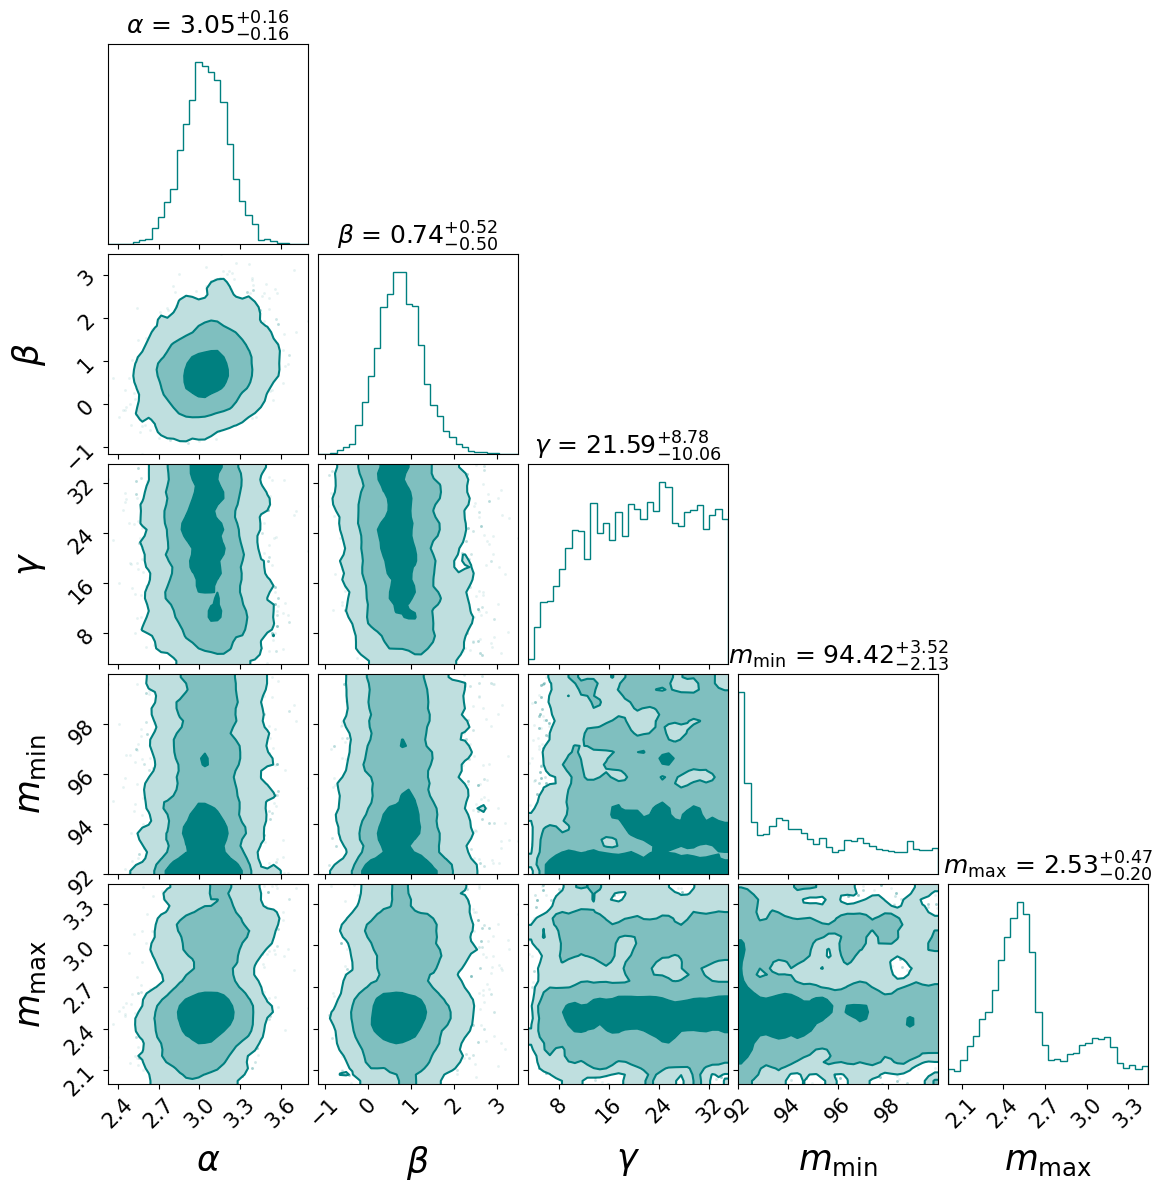

In [9]:
plt.rcParams.update({'font.size': 15})
corner.corner(PL_result_dict, **corner_kwargs)
corner.corner(PL_result_dict, **corner_kwargs)

In [3]:
def PL_m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    return m2min
    
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    return m2min


Text(0, 0.5, '$m_2^{\\rm min}$')

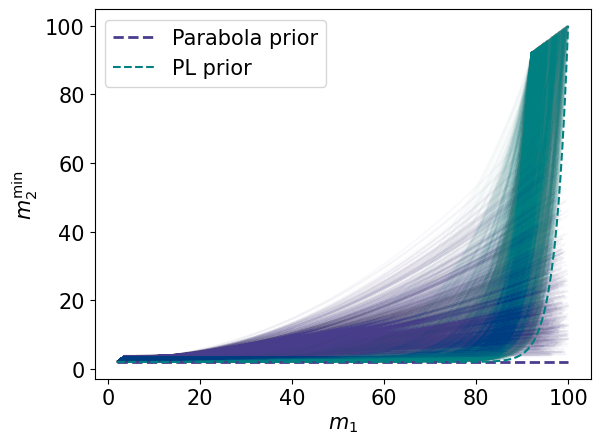

In [16]:
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.), color='darkslateblue', ls='dashed',\
         linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$q_{\\rm min}$')

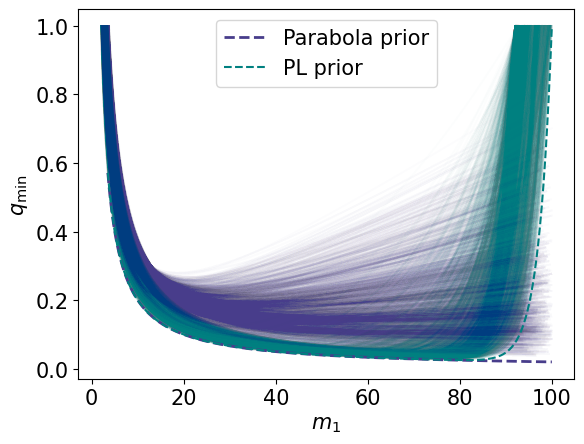

In [22]:
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
plt.legend()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$q_{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

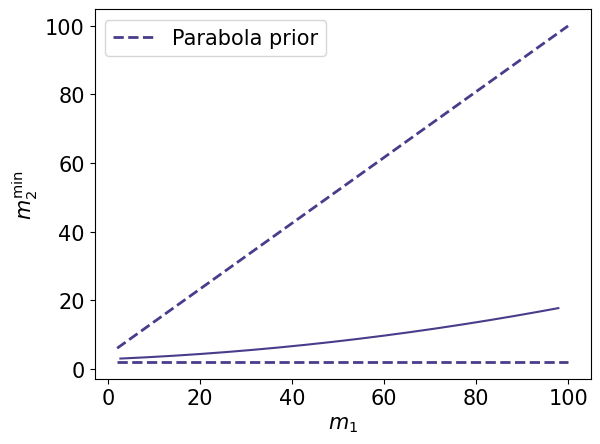

In [19]:
i=40
plt.rcParams.update({'font.size': 15})

mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                 PL_result_dict['gamma'][i])

mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
m2min_parabola = parabola_m2min_m1(mass1_parabola, 60., 3.,\
                 0.06, 0.001)
#plt.plot(mass1_PL, m2min_PL, color='teal')
plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue')

mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.), color='darkslateblue', ls='dashed',\
         linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, np.linspace(6., 100.,1000), color='darkslateblue', ls='dashed',\
         linewidth=2.)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
#plt.legend()
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,6.,1.), color='teal', ls='dashed')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

In [ ]:
i=40

mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                 PL_result_dict['gamma'][i])

mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
m2min_parabola = parabola_m2min_m1(mass1_parabola, 60., 3.,\
                 0.05, 0.01)
plt.plot(mass1_PL, m2min_PL, color='limegreen')
plt.plot(mass1_parabola, m2min_parabola, color='indigo')

mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.), color='indigo', ls='dashed',\
         linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, np.linspace(6., 100.,1000), color='indigo', ls='dashed',\
         linewidth=2.)
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='limegreen', ls='dashed', label='PL prior')
plt.legend()
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,6.,1.), color='limegreen', ls='dashed')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$p(q)$')

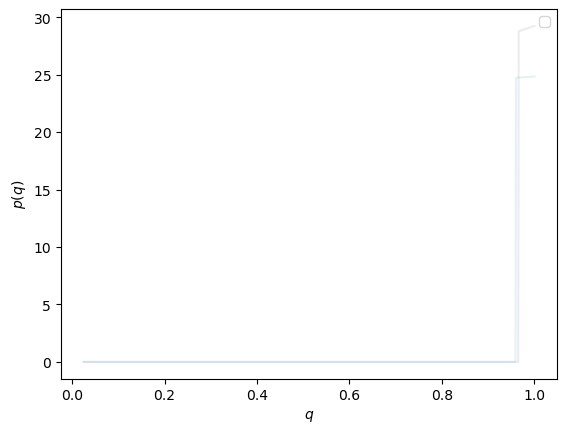

In [46]:
i=1#len(result['posterior']['alpha'])):
mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                 PL_result_dict['gamma'][i])

mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                 parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])

mass_ratio_parabola = np.linspace(2.5/100, 1., 1000)
p_q_parabola = powerlaw(mass_ratio_parabola, parabola_result_dict['beta'][i], 1, m2min_parabola[i]/mass1_parabola[i])
mass_ratio_PL = np.linspace(2.5/100, 1., 1000)
p_q_PL = powerlaw(mass_ratio_PL, PL_result_dict['beta'][i], 1, m2min_PL[i]/mass1_PL[i])

plt.plot(mass_ratio_PL, p_q_PL, color='teal', alpha=0.1)
plt.plot(mass_ratio_parabola, p_q_parabola, color='darkslateblue', alpha=0.1)

plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$p(q)$')

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


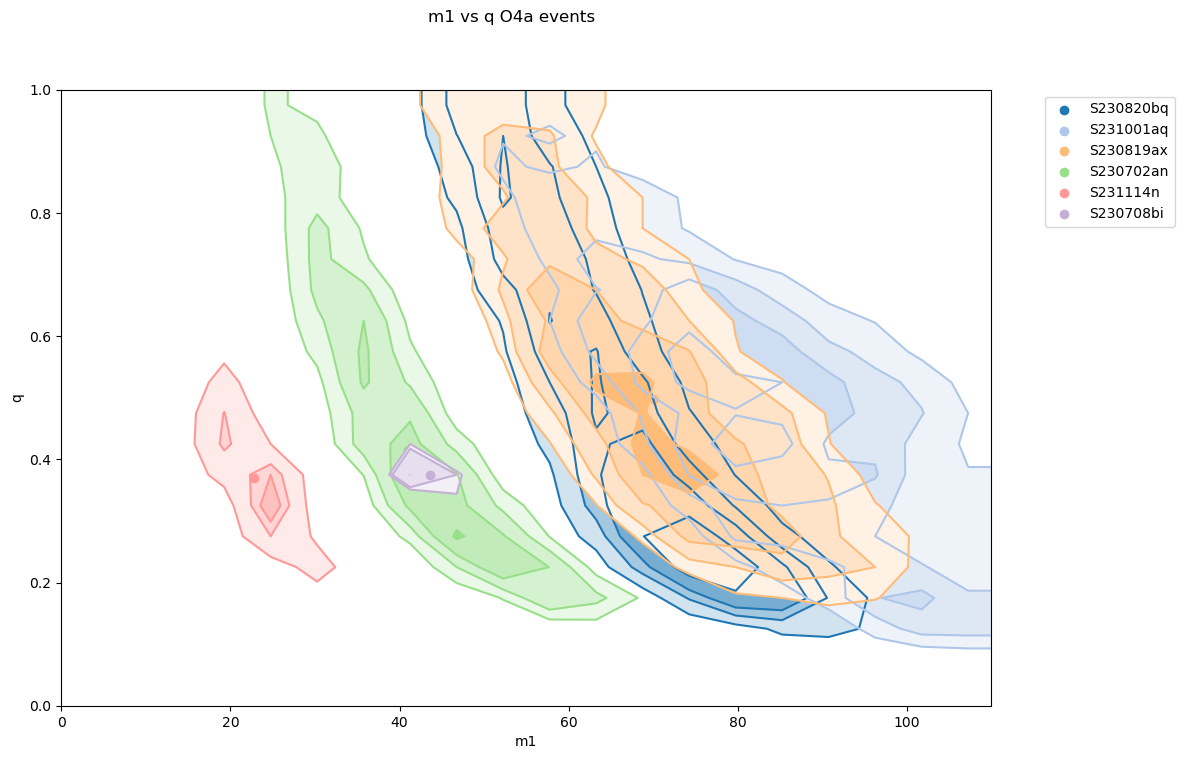

In [77]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)

#plot events
for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    eventname = (os.path.basename(filename)).split('.')[0]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i], contour_kwargs={'label':f'{eventname}'})
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

"""
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
"""

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q O4a events')
plt.savefig('m1_vs_q_O4a_events_nomodels.pdf', bbox_inches='tight')

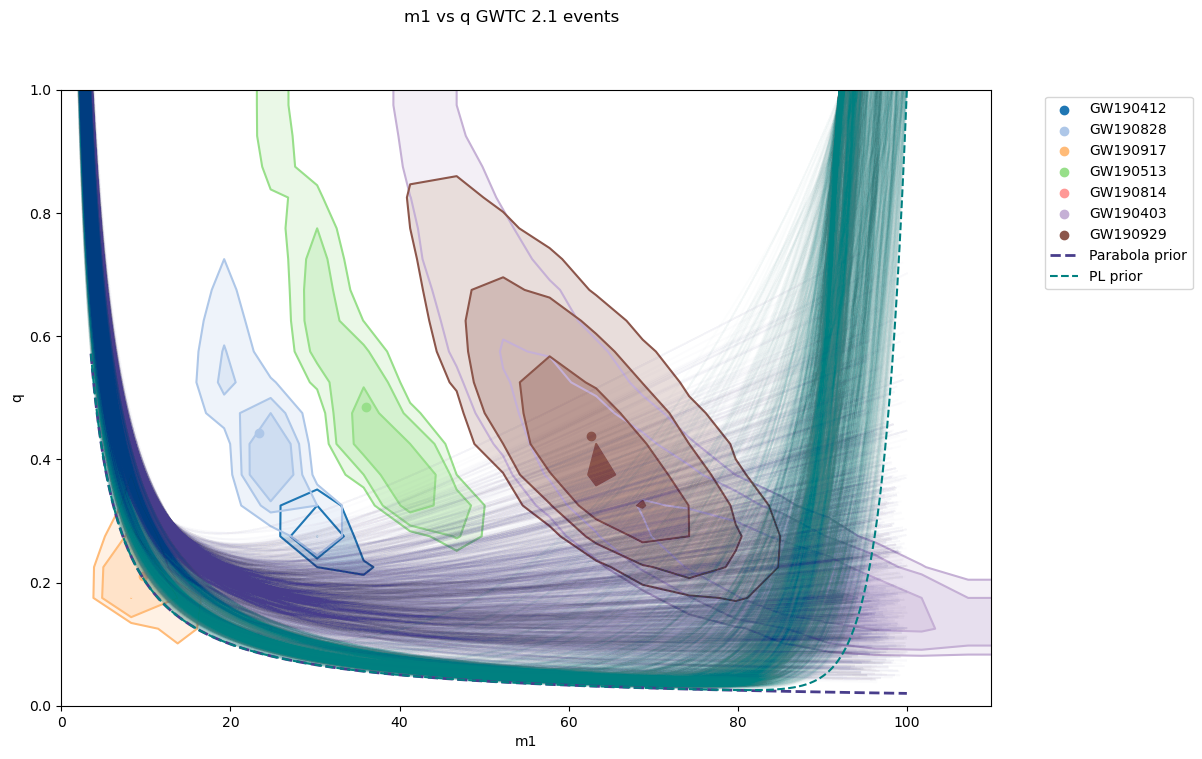

In [79]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1
        
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')


plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 2.1 events')
plt.savefig('m1_vs_q_GWTC21_events_models.pdf', bbox_inches='tight')

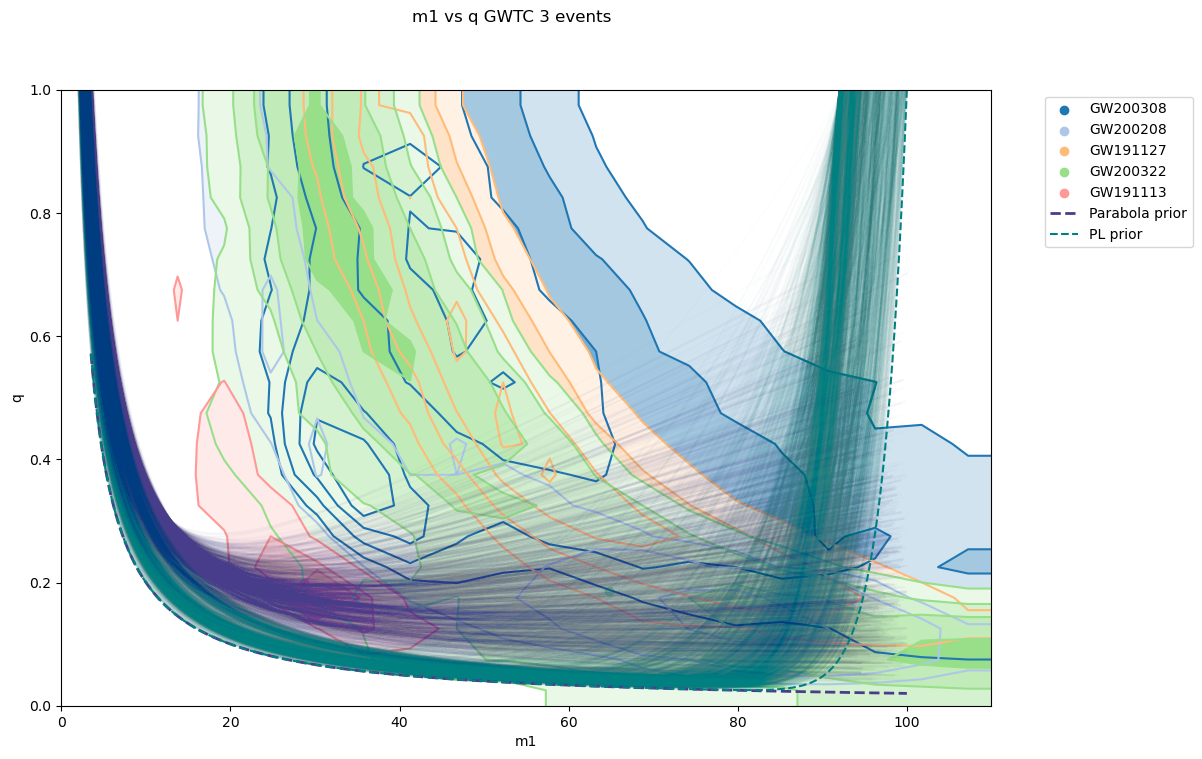

In [80]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)


for filename in glob.glob("m1_q_event_samples/IGWN-GWTC3*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 3 events')
plt.savefig('m1_vs_q_GWTC_3_events_models.pdf', bbox_inches='tight')

All Gamma/Zeta model

In [4]:
parabola_allgamma_zeta_nestle = h5py.File('O4a_parabolam2min_nlive500_allgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
parabola_allgamma_zeta_dynesty = h5py.File('O4a_parabolam2min_prod_allgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
parabola_no190814 = h5py.File('O4a_parabolam2min_prod_allgammazeta_no190814/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

In [6]:
parabola_nestle_dict = {'alpha':parabola_allgamma_zeta_nestle['posterior']['alpha'], 
                         'beta':parabola_allgamma_zeta_nestle['posterior']['beta'], 
                         'gamma':parabola_allgamma_zeta_nestle['posterior']['gamma'],
                         'zeta':parabola_allgamma_zeta_nestle['posterior']['zeta'],
                         'mmin': parabola_allgamma_zeta_nestle['posterior']['mmin'], 
                         'mmax': parabola_allgamma_zeta_nestle['posterior']['mmax']}

parabola_dynesty_dict = {'alpha':parabola_allgamma_zeta_dynesty['posterior']['alpha'], 
                         'beta':parabola_allgamma_zeta_dynesty['posterior']['beta'], 
                         'gamma':parabola_allgamma_zeta_dynesty['posterior']['gamma'],
                         'zeta':parabola_allgamma_zeta_dynesty['posterior']['zeta'],
                         'mmin': parabola_allgamma_zeta_dynesty['posterior']['mmin'], 
                         'mmax': parabola_allgamma_zeta_dynesty['posterior']['mmax']}
parabola_no190814_dict = {'alpha':parabola_no190814['posterior']['alpha'], 
                         'beta':parabola_no190814['posterior']['beta'], 
                         'gamma':parabola_no190814['posterior']['gamma'],
                         'zeta':parabola_no190814['posterior']['zeta'],
                         'mmin': parabola_no190814['posterior']['mmin'], 
                         'mmax': parabola_no190814['posterior']['mmax']}

Text(0, 0.5, '$m_2^{\\rm min}$')

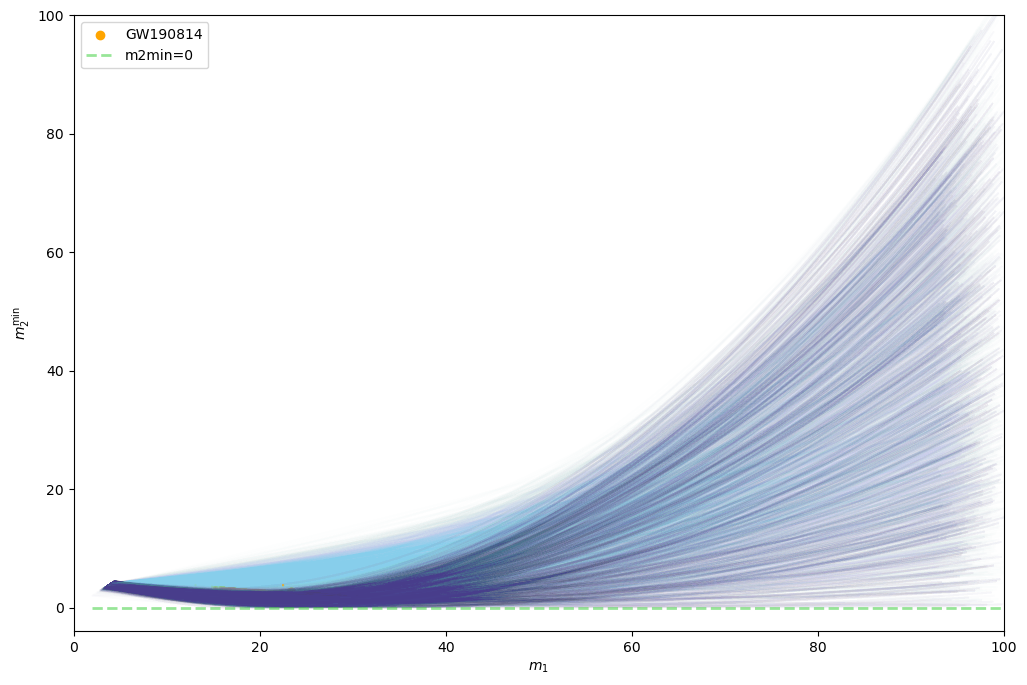

In [8]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola = np.linspace(parabola_nestle_dict['mmin'][i], parabola_nestle_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_nestle_dict['mmax'][i], parabola_nestle_dict['mmin'][i],\
                     parabola_nestle_dict['gamma'][i], parabola_nestle_dict['zeta'][i])
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

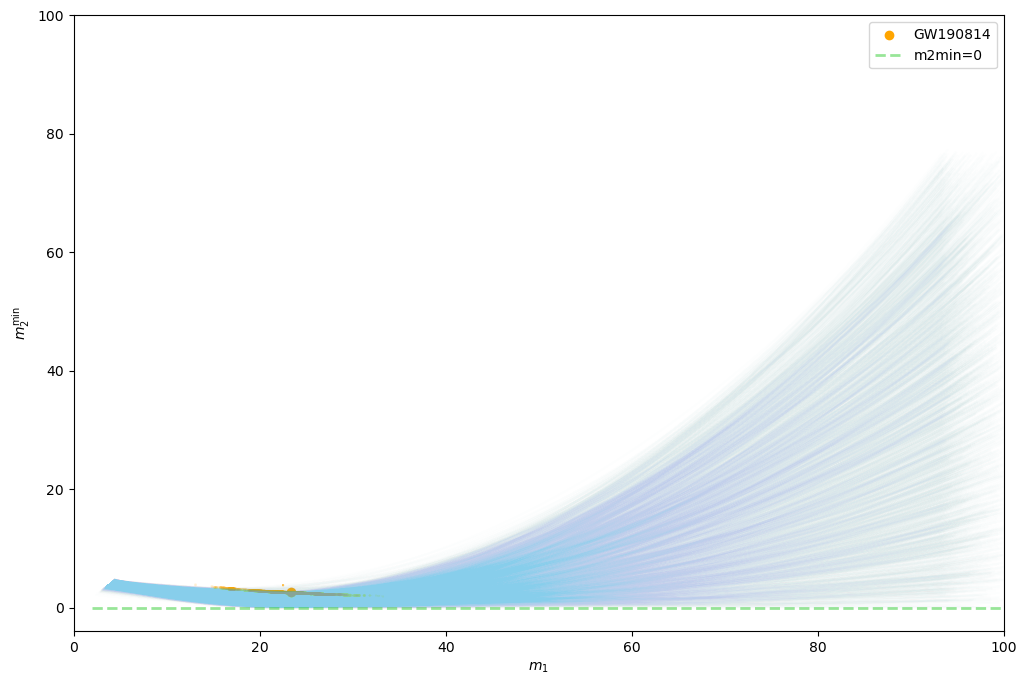

In [23]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2371):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_dynesty_dict['mmin'][i], parabola_dynesty_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola, parabola_dynesty_dict['mmax'][i], parabola_dynesty_dict['mmin'][i],\
                     parabola_dynesty_dict['gamma'][i], parabola_dynesty_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

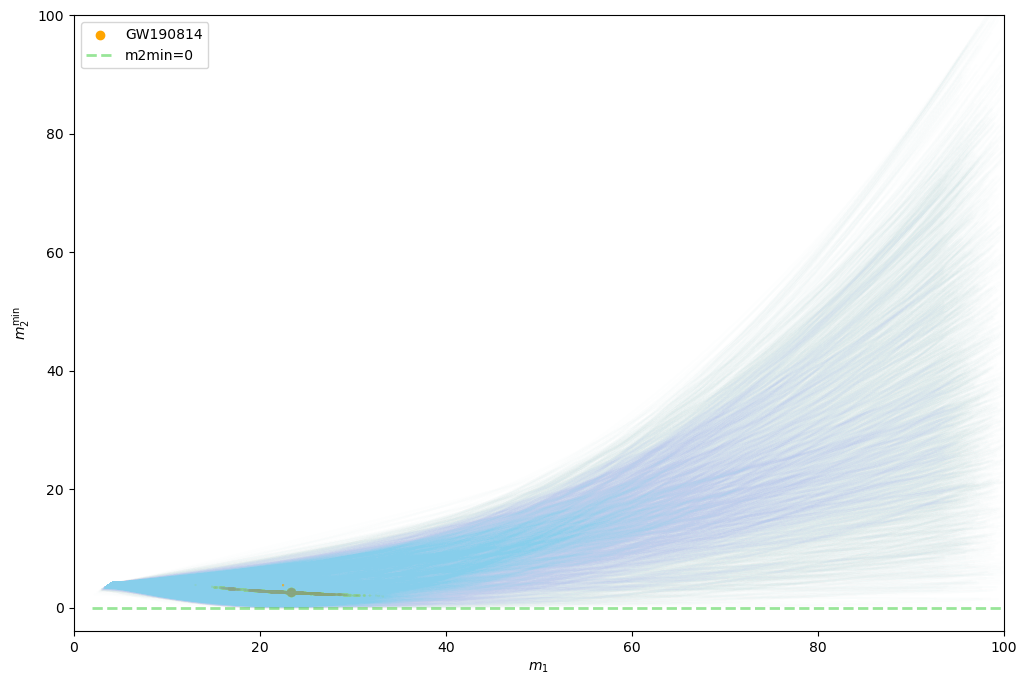

In [9]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

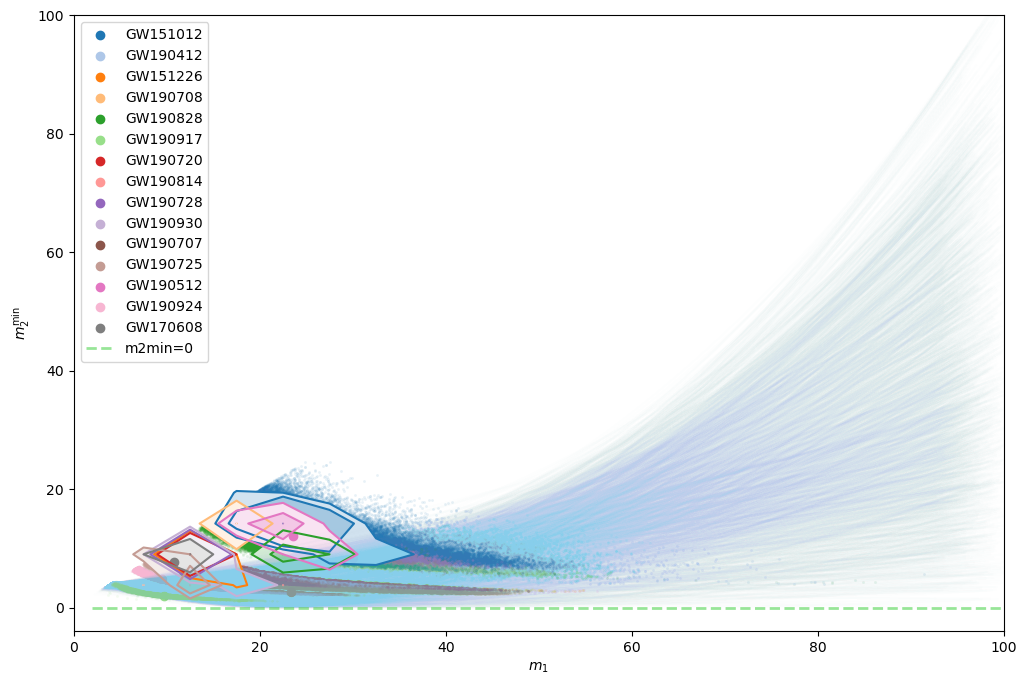

In [21]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')


Text(0, 0.5, '$m_2^{\\rm min}$')

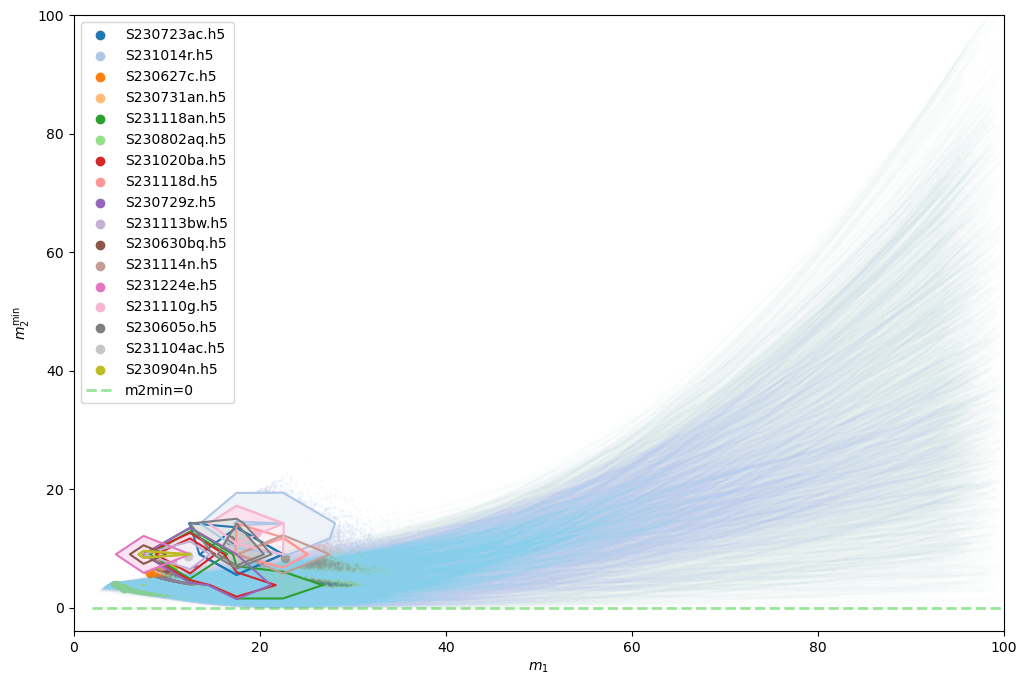

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')


Text(0, 0.5, '$m_2^{\\rm min}$')

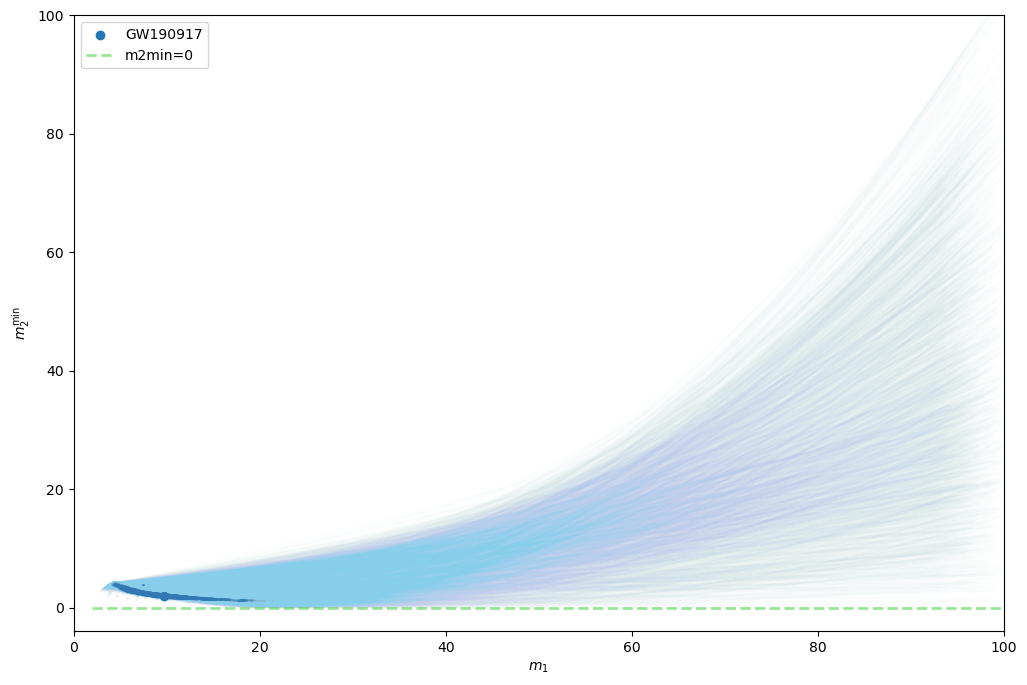

In [23]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190917_114630_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')
